In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from proj1_visualization import *
from proj1_cross_validation import *

from proj1_utils import *
from implementations import *
from implementations_utils import *

from proj1_helpers import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = '../data/train.csv'  
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = '../data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Do your thing crazy machine learning thing here :) ...

### Explore the data

In [3]:
cat_cols = [22]           # PRI_jet_num: the only categorical column
tX_num, tX_cat = split_numerical_categorical(tX,cat_cols)

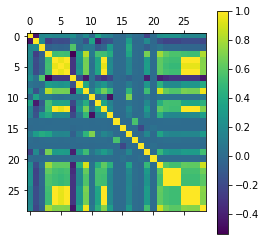

In [4]:
plt.matshow(np.corrcoef(tX_num,rowvar=False))
plt.colorbar()

In [5]:
np.corrcoef(tX_num[:,22:25],rowvar = False)

array([[1.        , 0.99610001, 0.9960998 ],
       [0.99610001, 1.        , 0.99999184],
       [0.9960998 , 0.99999184, 1.        ]])

In [6]:
np.corrcoef(tX_num[:,25:28],rowvar = False)

array([[1.        , 0.99935235, 0.99935185],
       [0.99935235, 1.        , 0.99999477],
       [0.99935185, 0.99999477, 1.        ]])

In [7]:
corr_cols = [4,6,25,26,23,24]
tX_num_uncorr = np.delete(tX_num,corr_cols,axis = 1)

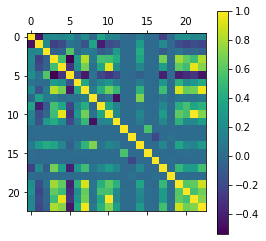

In [8]:
plt.matshow(np.corrcoef(tX_num_uncorr,rowvar=False))
plt.colorbar()

In [9]:
tX_test_num, tX_test_cat = split_numerical_categorical(tX_test,cat_cols)

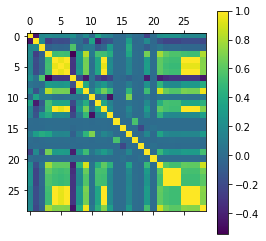

In [10]:
plt.matshow(np.corrcoef(tX_test_num,rowvar=False))
plt.colorbar()

In [11]:
tX_test_num_uncorr = np.delete(tX_test_num,corr_cols,axis = 1)

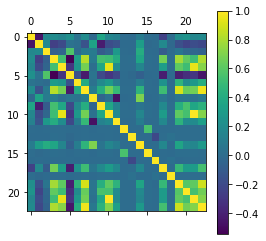

In [12]:
plt.matshow(np.corrcoef(tX_test_num_uncorr,rowvar=False))
plt.colorbar()

## Preprocessing

In [13]:
# Treat numerical values
best_degree = 0
full_x_train_num_nan = replace_undef_val_with_nan(tX_num_uncorr)
full_x_train_num_std, train_mean, train_std = nan_standardize_fit(full_x_train_num_nan)
# full_x_train_num_valid_std = replace_nan_val_with_mean(full_x_train_num_nan_std)
full_x_train_num_valid = replace_nan_val_with_median(full_x_train_num_std)
full_x_train_num_valid = replace_iqr_outliers(full_x_train_num_valid)
# Treat categorical values
full_x_train_ohe_cat = one_hot_encode(tX_cat)
full_x_train_poly = build_poly(full_x_train_num_valid , best_degree)
full_x_train = np.hstack((full_x_train_poly,full_x_train_ohe_cat))
# Treat labels
full_y_train = y
# full_y_train = relabel_y_non_negative(y).reshape(-1,1)

In [14]:
x_train, y_train, x_val, y_val = split_data(full_x_train,full_y_train,0.8)

In [15]:
# Treat numerical values
x_test_num_nan = replace_undef_val_with_nan(tX_test_num_uncorr)
x_test_num_nan_std = nan_standardize_transform(x_test_num_nan,train_mean,train_std)
# x_test_num_nan_std = nan_standardize_with_median_transform(x_test_num_nan,train_median,train_std)
x_test_num_valid_std = replace_nan_val_with_median(x_test_num_nan_std)
x_test_num_valid_std = replace_iqr_outliers(x_test_num_valid_std)
# x_test_num_valid_std = replace_nan_val_with_mean(x_test_num_nan_std)
x_test_ohe_cat = one_hot_encode(tX_test_cat)
x_test_poly = build_poly(x_test_num_valid_std , best_degree)
x_test = np.hstack((x_test_poly,x_test_ohe_cat))

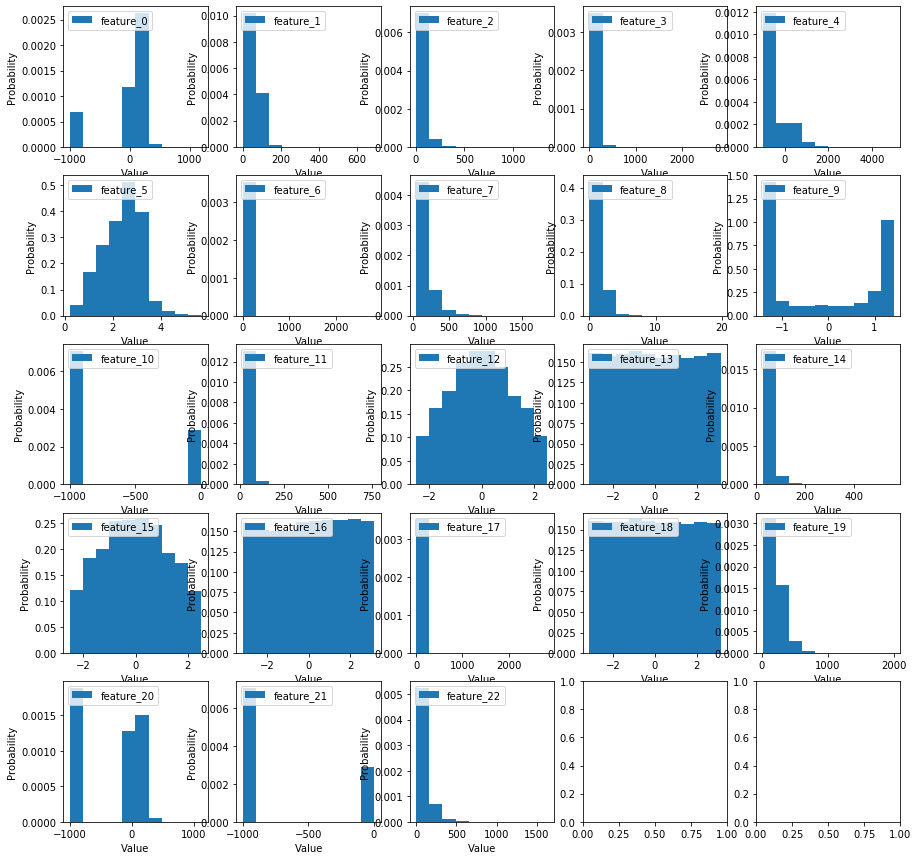

In [16]:
multiHistPlots(tX_num_uncorr)

## Explore feature 12: Det_met_phi_centrality

## Linear Regression - Gradient Descent

In [ ]:
#best degree 6 already found
#best gamma 2.782559402207126e-06

method = 1; # 1 for GD and 2 for SGD

gammas = np.logspace(-10,0,num=10)
#gammas = [0.000002]
degrees = np.arange(2,10)
k_fold = 4 
seed = 7
best_degree, best_gamma, mse_tr, mse_te = cross_validation_linear_reg_best_degree_best_gamma(y_train, x_train, degrees, gammas, k_fold, seed,1)
print(best_degree, best_gamma)

Gradient Descent: degree=2, gamma=1e-10
GD(1/199): loss=0.4999999997996008, w0=-3.16e-11, w1=1.1417081630573429e-11
GD(51/199): loss=0.499999989779632, w0=-1.6115999425673373e-09, w1=5.822711568028652e-10
GD(101/199): loss=0.49999997975966454, w0=-3.1915997725216175e-09, w1=1.15312521951166e-09
GD(151/199): loss=0.4999999697396984, w0=-4.771599489862848e-09, w1=1.723979269756958e-09
Gradient Descent: degree=2, gamma=1e-10
GD(1/199): loss=0.49999999979938436, w0=-3.1605333333333335e-11, w1=1.1561642766513766e-11
GD(51/199): loss=0.4999999897686036, w0=-1.6118719425230544e-09, w1=5.896437746580109e-10
GD(101/199): loss=0.4999999797378239, w0=-3.1921384390128817e-09, w1=1.1677258939334415e-09
GD(151/199): loss=0.49999996970704536, w0=-4.772404822802823e-09, w1=1.7458080005928083e-09
Gradient Descent: degree=2, gamma=1e-10
GD(1/199): loss=0.4999999998002086, w0=-3.149066666666667e-11, w1=1.1451155874033823e-11
GD(51/199): loss=0.49999998981064125, w0=-1.6060239426849821e-09, w1=5.840089432


Gradient Descent: degree=2, gamma=3.5938136638046256e-05
GD(1/199): loss=0.4999279951966323, w0=-1.1356451177622617e-05, w1=4.103086396472758e-06
GD(51/199): loss=0.4964029720879883, w0=-0.0005718241658986788, w1=0.0002084426073919058
GD(101/199): loss=0.4930205187331639, w0=-0.0011181213880170203, w1=0.0004112090544185197
GD(151/199): loss=0.4897736217710883, w0=-0.0016506131384904604, w1=0.0006124381953032333
Gradient Descent: degree=2, gamma=3.5938136638046256e-05
GD(1/199): loss=0.49992791750664534, w0=-1.1358367878243314e-05, w1=4.155038975032508e-06
GD(51/199): loss=0.4963991322864788, w0=-0.0005719163131224719, w1=0.00021108223457477776
GD(101/199): loss=0.4930131420301702, w0=-0.0011182932319303241, w1=0.0004164172167738376
GD(151/199): loss=0.48976291269107275, w0=-0.00165085479941848, w1=0.0006201963029599735
Gradient Descent: degree=2, gamma=3.5938136638046256e-05
GD(1/199): loss=0.49992821365848483, w0=-1.1317158814898353e-05, w1=4.115332044645935e-06
GD(51/199): loss=0.49

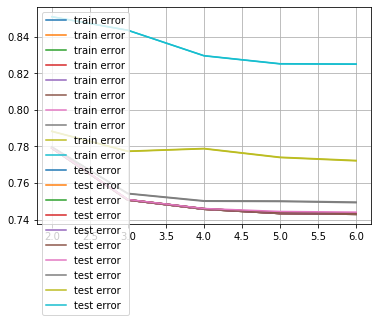

In [43]:
#plt.plot(degrees,mse_tr,label = 'train error')
#plt.plot(degrees,mse_te,label = 'test error')
#plt.grid()
#plt.legend(loc = 2)
#plt.show()

## Linear Regression - Stochastic Gradient Descent

In [ ]:
plt.semilogx(lambdas,lambda_rmse_tr,label = 'train error')
plt.semilogx(lambdas,lambda_rmse_te,label = 'test error')
# # plt.plot(lambdas,rmse_tr,label = 'train error')
# # plt.plot(lambdas,rmse_te,label = 'test error')
plt.grid()
plt.legend(loc = 2)
plt.show()

## Linear Regression - Gradient Descent

In [51]:
best_gamma = 2.782559402207126e-06
gamma = best_gamma
initial_w = np.zeros(x_train.shape[1])
max_iters = 2000

weights, loss = least_squares_GD(y_train, x_train, initial_w, max_iters, gamma)## Linear Regression - Stochastic Gradient Descent


Gradient Descent(0/1999): loss=0.4995810293008048, w0=-8.782592241186352e-07, w1=3.1950704815459613e-07
Gradient Descent(50/1999): loss=0.48561510602763924, w0=-4.255702001168212e-05, w1=1.6432963841794664e-05
Gradient Descent(100/1999): loss=0.4785129589032779, w0=-8.092162804073012e-05, w1=3.2679852723440155e-05
Gradient Descent(150/1999): loss=0.4739281941434474, w0=-0.00011700351738867447, w1=4.893579877067656e-05
Gradient Descent(200/1999): loss=0.4704393919865991, w0=-0.00015139476271624187, w1=6.513750948030699e-05
Gradient Descent(250/1999): loss=0.46750612170645794, w0=-0.00018445377759328135, w1=8.12523594910289e-05
Gradient Descent(300/1999): loss=0.46489966361848656, w0=-0.0002164089357647723, w1=9.726367927605855e-05
Gradient Descent(350/1999): loss=0.4625153655282283, w0=-0.00024741291255889566, w1=0.00011316340970994541
Gradient Descent(400/1999): loss=0.4603015840342416, w0=-0.0002775724530686317, w1=0.00012894829582786284
Gradient Descent(450/1999): loss=0.458230299014

## Linear Regression - Stochastic Gradient Descent

In [ ]:
best_gamma = 2.782559402207126e-06
gamma = best_gamma
initial_w = np.zeros(x_train.shape[1])
max_iters = 2000
batch_size = 1

weights, loss = least_squares_SGD(y_train, x_train, initial_w, batch_size, max_iters, gamma)## Linear Regression - Stochastic Gradient Descent



## Generate predictions and save ouput in csv format for submission:

In [53]:
y_pred = predict_labels(weights, x_val)
y_val = relabel_y_negative(y_val)

In [54]:
# Just to check
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
print(confusion_matrix(y_val,y_pred))
print(accuracy_score(y_val,y_pred))
print(f1_score(y_val,y_pred))
print(recall_score(y_val,y_pred))
print(precision_score(y_val,y_pred))

[[31886   884]
 [14773  2457]]
0.68686
0.23887997666618052
0.14260011607661055
0.7354085603112841


In [ ]:
get_label_y_counts(y_pred)

In [ ]:
OUTPUT_PATH = '../output_submission/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, x_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)